In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import time 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import plotly.graph_objects as go
import re
# Natural Language Tool Kit 
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from collections import Counter
import cufflinks as cf
cf.go_offline()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
carrefour = pd.read_csv("https://raw.githubusercontent.com/Delphine-Jean/Delphine-Jean_portfolio/master/Portfolio%20Data%20Science/Projet%20final/carrefour_comment.csv")
aldi = pd.read_csv("https://raw.githubusercontent.com/Delphine-Jean/Delphine-Jean_portfolio/master/Portfolio%20Data%20Science/Projet%20final/aldi_comment.csv")
casino = pd.read_csv("https://raw.githubusercontent.com/Delphine-Jean/Delphine-Jean_portfolio/master/Portfolio%20Data%20Science/Projet%20final/casino_comment.csv")
intermarche = pd.read_csv("https://raw.githubusercontent.com/Delphine-Jean/Delphine-Jean_portfolio/master/Portfolio%20Data%20Science/Projet%20final/intermarche_comment.csv")
leclerc = pd.read_csv("https://raw.githubusercontent.com/Delphine-Jean/Delphine-Jean_portfolio/master/Portfolio%20Data%20Science/Projet%20final/leclerc_comment.csv")
lidl = pd.read_csv("https://raw.githubusercontent.com/Delphine-Jean/Delphine-Jean_portfolio/master/Portfolio%20Data%20Science/Projet%20final/lidl_comment.csv")

In [3]:
carrefour.head()

,Title,Content,Date,Rating
0,Bonjour (:,"Bonjour, pour parler du Carrefour de Feurs (42...",2020-10-25,medium
1,Viande à jeter…,"La semaine dernière,j’ai acheté une selle d’ag...",2020-10-24,medium
2,"carrefour france, petit bleu cremeux en ls",le meilleur bleu en ls qu on puisse trouver es...,2020-10-23,medium
3,Carrefour Les Portes en Ré à éviter,Carrefour Les Portes en Ré en constante ruptur...,2020-10-23,medium
4,Carrefour drive et cagnotte pas reversé sur ma...,J'ai fait un gros achat en septembre sur le dr...,2020-10-23,medium


In [4]:
carrefour['Enseigne'] = 'Carrefour'
aldi['Enseigne'] = 'Aldi'
casino['Enseigne'] = 'Casino'
intermarche['Enseigne'] = 'Intermarché'
leclerc['Enseigne'] = 'Leclerc'
lidl['Enseigne'] = 'Lidl'

carrefour.head()

,Title,Content,Date,Rating,Enseigne
0,Bonjour (:,"Bonjour, pour parler du Carrefour de Feurs (42...",2020-10-25,medium,Carrefour
1,Viande à jeter…,"La semaine dernière,j’ai acheté une selle d’ag...",2020-10-24,medium,Carrefour
2,"carrefour france, petit bleu cremeux en ls",le meilleur bleu en ls qu on puisse trouver es...,2020-10-23,medium,Carrefour
3,Carrefour Les Portes en Ré à éviter,Carrefour Les Portes en Ré en constante ruptur...,2020-10-23,medium,Carrefour
4,Carrefour drive et cagnotte pas reversé sur ma...,J'ai fait un gros achat en septembre sur le dr...,2020-10-23,medium,Carrefour


In [5]:
frames = [carrefour,aldi,casino,intermarche,leclerc,lidl]

merged_df = pd.concat(frames)

In [6]:
merged_df.describe()

,Title,Content,Date,Rating,Enseigne
count,240,240,240,240,240
unique,239,240,96,1,6
top,Bonjour,Pas contente du tout de la façon ou vous range...,2020-10-23,medium,Lidl
freq,2,1,10,240,40


In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 39
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     240 non-null    object
 1   Content   240 non-null    object
 2   Date      240 non-null    object
 3   Rating    240 non-null    object
 4   Enseigne  240 non-null    object
dtypes: object(5)
memory usage: 11.2+ KB


In [13]:
merged_df = merged_df.iloc[:,1:]

In [18]:
merged_df.head()

,Content,Date,Rating,Enseigne
0,"Bonjour, pour parler du Carrefour de Feurs (42...",2020-10-25,medium,Carrefour
1,"La semaine dernière,j’ai acheté une selle d’ag...",2020-10-24,medium,Carrefour
2,le meilleur bleu en ls qu on puisse trouver es...,2020-10-23,medium,Carrefour
3,Carrefour Les Portes en Ré en constante ruptur...,2020-10-23,medium,Carrefour
4,J'ai fait un gros achat en septembre sur le dr...,2020-10-23,medium,Carrefour


In [14]:
train = merged_df.iloc[0:190,:]
test = merged_df.iloc[190:240,:]

In [15]:
train.shape

(190, 4)

In [16]:
test.shape

(50, 4)

In [17]:
display(HTML(f"""
   
        <ul class="list-group">
          <li class="list-group-item disabled" aria-disabled="true"><h4>Shape of Train and Test Dataset</h4></li>
          <li class="list-group-item"><h4>Number of rows in Train dataset is: <span class="label label-primary">{ train.shape[0]:,}</span></h4></li>
          <li class="list-group-item"> <h4>Number of columns Train dataset is <span class="label label-primary">{train.shape[1]}</span></h4></li>
          <li class="list-group-item"><h4>Number of rows in Test dataset is: <span class="label label-success">{ test.shape[0]:,}</span></h4></li>
          <li class="list-group-item"><h4>Number of columns Test dataset is <span class="label label-success">{test.shape[1]}</span></h4></li>
        </ul>
  
    """))

In [38]:
STOPWORDS.add('le')  # remove htps to the world Cloud
STOPWORDS.add('la')
STOPWORDS.add('les')
STOPWORDS.add('en')
STOPWORDS.add('des')
STOPWORDS.add('sur')
STOPWORDS.add('pour')
STOPWORDS.add('de')
STOPWORDS.add('avec')
STOPWORDS.add('trés')
STOPWORDS.add('leur')
STOPWORDS.add('est')
STOPWORDS.add('fait')
STOPWORDS.add('mon')
STOPWORDS.add('ma')
STOPWORDS.add('euro')
STOPWORDS.add('faire')
STOPWORDS.add('que')
STOPWORDS.add('quand')
STOPWORDS.add('lui')
STOPWORDS.add('tout')
STOPWORDS.add('une')
STOPWORDS.add('un')
STOPWORDS.add('plus')
STOPWORDS.add('votre')
STOPWORDS.add('notre')
STOPWORDS.add('il')
STOPWORDS.add('elle')
STOPWORDS.add('suis')
STOPWORDS.add('et')
STOPWORDS.add('pas')
STOPWORDS.add('ne')
STOPWORDS.add('aucun')
STOPWORDS.add('aucune')
STOPWORDS.add('même')
STOPWORDS.add('été')
STOPWORDS.add('au')
STOPWORDS.add('aux')
STOPWORDS.add("c'est")
STOPWORDS.add('jamais')
STOPWORDS.add('dit')
STOPWORDS.add('alors')
STOPWORDS.add('car')
STOPWORDS.add('dans')
STOPWORDS.add('je')
STOPWORDS.add('vous')
STOPWORDS.add('nous')
STOPWORDS.add('qui')
STOPWORDS.add('ce')
STOPWORDS.add('du')
STOPWORDS.add('mes')
STOPWORDS.add('très')
STOPWORDS.add('toujours')
STOPWORDS.add('mai')
STOPWORDS.add('cette')
STOPWORDS.add('être')
STOPWORDS.add('comme')
STOPWORDS.add('peut')
STOPWORDS.add('encore')
STOPWORDS.add('bien')
STOPWORDS.add("j'ai")
STOPWORDS.add('mais')
STOPWORDS.add('sont')

In [39]:
def Plot_world(text):
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    
    for val in text: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 5000, height = 4000, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (12, 12), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

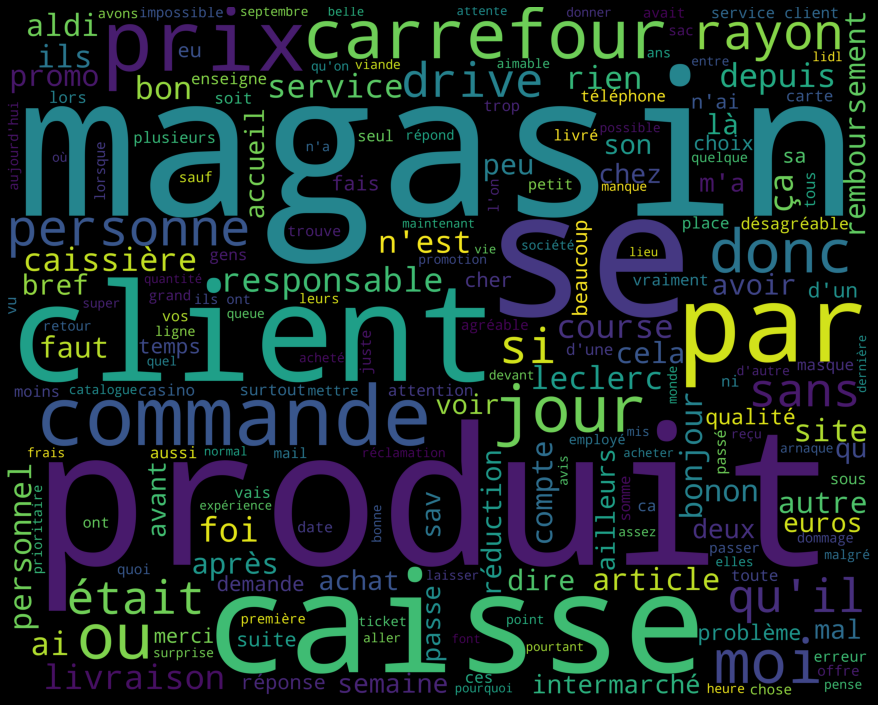

In [40]:
text = train.Content.values

Plot_world(text)

In [ ]:
# How many unique words have this text
def counter_word (text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] += 1
    return count